In [2]:
import librosa
from transformers import Pop2PianoForConditionalGeneration, Pop2PianoProcessor, Pop2PianoTokenizer
import matplotlib.pyplot as plt
import mido
import numpy as np
import torch
from torch import nn
from torch.nn import CrossEntropyLoss
import pretty_midi

In [3]:
model = Pop2PianoForConditionalGeneration.from_pretrained("sweetcocoa/pop2piano")
processor = Pop2PianoProcessor.from_pretrained("sweetcocoa/pop2piano")
tokenizer = Pop2PianoTokenizer.from_pretrained("sweetcocoa/pop2piano")

In [4]:
audio, sr = librosa.load("./processed/audio/Mountain - Mississippi Queen.ogg", sr=44100)  # feel free to change the sr to a suitable value.


In [5]:
inputs = processor(audio=audio, sampling_rate=sr, return_tensors="pt")

In [6]:
print(inputs.keys())

dict_keys(['input_features', 'beatsteps', 'extrapolated_beatstep'])


Text(0.5, 1.0, 'Input Spectrogram 0')

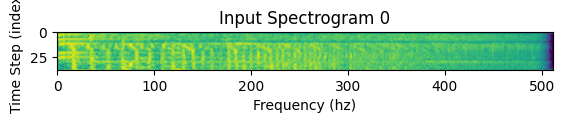

In [7]:
plt.imshow(inputs["input_features"][0])
plt.xlabel("Frequency (hz)")
plt.ylabel("Time Step (index)")
plt.title("Input Spectrogram 0")

In [8]:
# midi = pretty_midi.PrettyMIDI("./mountain.mid")
midi = pretty_midi.PrettyMIDI("./processed/midi/Mountain - Mississippi Queen.mid")

In [9]:
print(midi.instruments[0].notes)

[Note(start=5.250000, end=5.251042, pitch=72, velocity=100), Note(start=5.250000, end=5.251042, pitch=78, velocity=100), Note(start=5.500000, end=5.501042, pitch=73, velocity=100), Note(start=5.500000, end=5.501042, pitch=78, velocity=100), Note(start=5.750000, end=5.751042, pitch=75, velocity=100), Note(start=5.750000, end=5.751042, pitch=78, velocity=100), Note(start=6.000000, end=6.621875, pitch=74, velocity=100), Note(start=6.000000, end=6.621875, pitch=78, velocity=100), Note(start=9.250000, end=9.251042, pitch=72, velocity=100), Note(start=9.250000, end=9.251042, pitch=78, velocity=100), Note(start=9.500000, end=9.501042, pitch=73, velocity=100), Note(start=9.500000, end=9.501042, pitch=78, velocity=100), Note(start=9.750000, end=9.751042, pitch=75, velocity=100), Note(start=9.750000, end=9.751042, pitch=78, velocity=100), Note(start=10.000000, end=10.625000, pitch=74, velocity=100), Note(start=10.000000, end=10.625000, pitch=78, velocity=100), Note(start=13.750000, end=14.037500

In [10]:
# batch = np.array([midi])
# target_token_ids = tokenizer(midi.instruments[0].notes, return_tensors="pt", padding="max_length", max_length=89, truncation=True)
# target_token_ids
# GENERATES TOKENS FROM MIDI. COULD PROBABLY USE THIS TO CALCULATE LOSS
labels = tokenizer(midi.instruments[0].notes, return_tensors="pt", padding="max_length", max_length=89, truncation=True)

In [11]:
labels

{'token_ids': tensor([139, 133,  76, 132,  76, 133,  82, 132,  82, 140, 133,  77, 132,  77,
        133,  82, 132,  82, 133,  79, 132,  79, 133,  82, 132,  82, 133,  78,
         82, 141, 132,  78,  82, 143, 133,  76, 132,  76, 133,  82, 132,  82,
        144, 133,  77, 132,  77, 133,  82, 132,  82, 133,  79, 132,  79, 133,
         82, 132,  82, 133,  78,  82, 145, 132,  78,  82, 148, 133,  78, 132,
         78, 133,  82, 132,  82, 133,  79, 132,  79, 133,  82, 132,  82, 133,
         78,  82, 149, 132,  78]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])}

In [12]:
model.generation_config.output_logits = True

In [13]:
model.generation_config

GenerationConfig {
  "composer_to_feature_token": {
    "composer1": 2052,
    "composer10": 2061,
    "composer11": 2062,
    "composer12": 2063,
    "composer13": 2064,
    "composer14": 2065,
    "composer15": 2066,
    "composer16": 2067,
    "composer17": 2068,
    "composer18": 2069,
    "composer19": 2070,
    "composer2": 2053,
    "composer20": 2071,
    "composer21": 2072,
    "composer3": 2054,
    "composer4": 2055,
    "composer5": 2056,
    "composer6": 2057,
    "composer7": 2058,
    "composer8": 2059,
    "composer9": 2060
  },
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "max_length": 256,
  "output_logits": true,
  "pad_token_id": 0
}

In [14]:
model_output = model.generate(inputs["input_features"], generation_config=model.generation_config, return_dict_in_generate=True)  
# output = tokenizer.batch_decode(
#     token_ids=model_output, feature_extractor_output=inputs
# )



In [15]:
model_output.logits

(tensor([[ -3.5080,   5.3074, -16.4919,  ..., -16.7558, -16.5689, -16.7493],
         [ -3.6114,   5.2210, -16.8682,  ..., -17.0927, -16.9368, -17.1285],
         [ -3.6364,   5.8048, -15.4844,  ..., -15.7480, -15.5735, -15.7612],
         ...,
         [ -3.7324,   6.2085, -17.3179,  ..., -17.5750, -17.3991, -17.6115],
         [ -1.6280,   9.3496, -13.6123,  ..., -13.8808, -13.6832, -13.8547],
         [ -3.8435,  10.2189, -15.0628,  ..., -15.3787, -15.1447, -15.3224]]),
 tensor([[-10.1558,   1.8194, -14.7653,  ..., -15.0660, -14.8187, -15.0004],
         [-10.2406,   1.5368, -15.5706,  ..., -15.8555, -15.6065, -15.8007],
         [-10.0275,   2.0574, -14.5918,  ..., -14.8910, -14.6520, -14.8375],
         ...,
         [-10.6392,   2.3231, -15.2983,  ..., -15.6051, -15.3531, -15.5587],
         [ 18.9714,   1.4675, -13.8516,  ..., -13.9048, -13.8255, -14.0211],
         [ 21.3067,   1.4670, -15.3173,  ..., -15.4150, -15.3594, -15.5076]]),
 tensor([[ -9.7085,  -5.0350, -17.2209,  ...

In [16]:
sequence_output = model_output[0]
sequence_output.size()

torch.Size([89, 100])

In [17]:
labels['token_ids'].size()

torch.Size([89])

In [18]:
model_output.logits

(tensor([[ -3.5080,   5.3074, -16.4919,  ..., -16.7558, -16.5689, -16.7493],
         [ -3.6114,   5.2210, -16.8682,  ..., -17.0927, -16.9368, -17.1285],
         [ -3.6364,   5.8048, -15.4844,  ..., -15.7480, -15.5735, -15.7612],
         ...,
         [ -3.7324,   6.2085, -17.3179,  ..., -17.5750, -17.3991, -17.6115],
         [ -1.6280,   9.3496, -13.6123,  ..., -13.8808, -13.6832, -13.8547],
         [ -3.8435,  10.2189, -15.0628,  ..., -15.3787, -15.1447, -15.3224]]),
 tensor([[-10.1558,   1.8194, -14.7653,  ..., -15.0660, -14.8187, -15.0004],
         [-10.2406,   1.5368, -15.5706,  ..., -15.8555, -15.6065, -15.8007],
         [-10.0275,   2.0574, -14.5918,  ..., -14.8910, -14.6520, -14.8375],
         ...,
         [-10.6392,   2.3231, -15.2983,  ..., -15.6051, -15.3531, -15.5587],
         [ 18.9714,   1.4675, -13.8516,  ..., -13.9048, -13.8255, -14.0211],
         [ 21.3067,   1.4670, -15.3173,  ..., -15.4150, -15.3594, -15.5076]]),
 tensor([[ -9.7085,  -5.0350, -17.2209,  ...

In [19]:
loss = CrossEntropyLoss()
loss(model_output[0].logits, labels['token_ids'].float())


AttributeError: 'Tensor' object has no attribute 'logits'